Mean Squared Error: 1.3237728819436818
R-squared: -0.28912911209375247


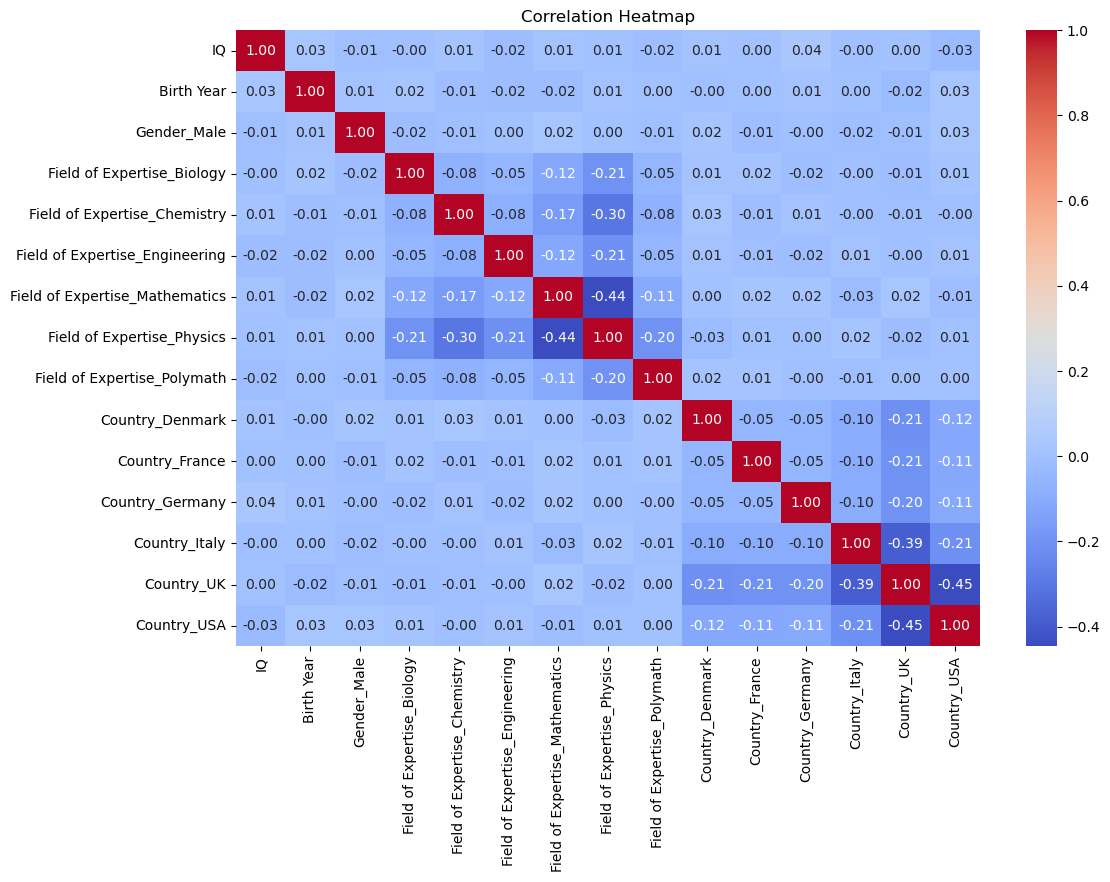

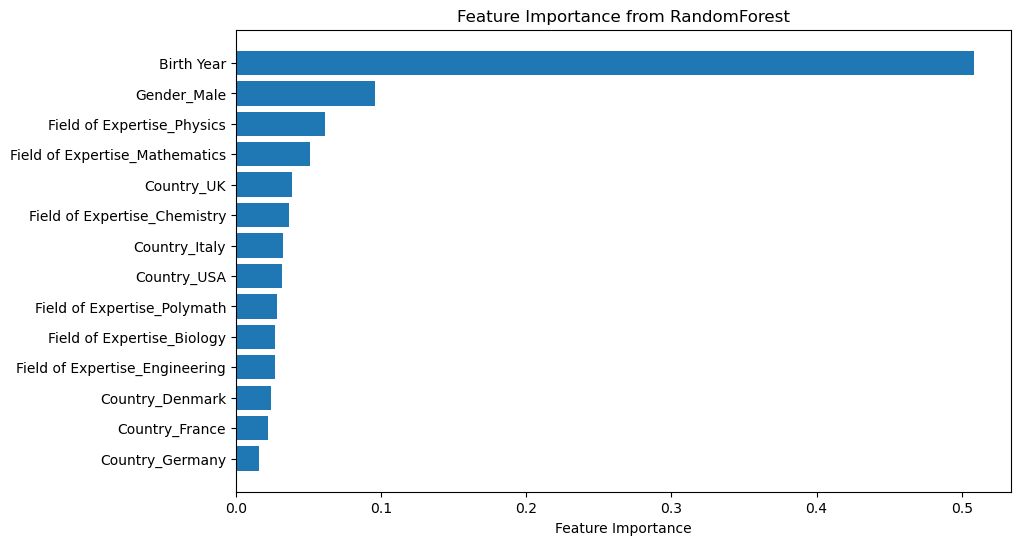

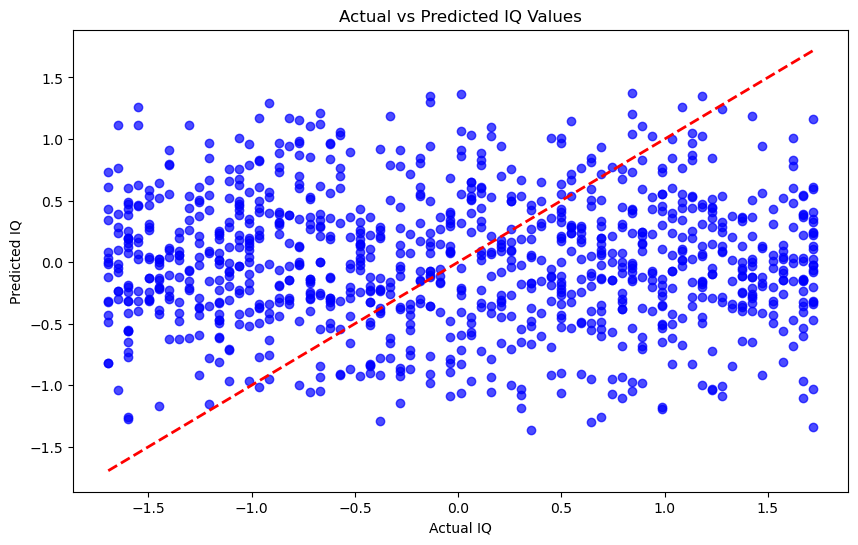

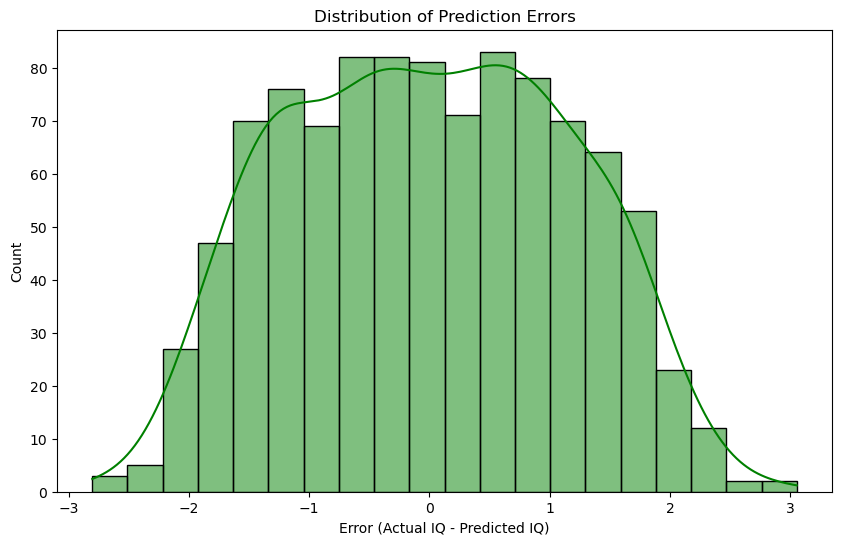

In [38]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the necessary dataset and preprocessing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'datasetai.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Data Preprocessing
data['IQ'].fillna(data['IQ'].mean(), inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Field of Expertise'].fillna(data['Field of Expertise'].mode()[0], inplace=True)
data = data.drop(columns=['Name', 'Achievements', 'Notable Works', 'Awards', 'Education', 'Influence'])
scaler = StandardScaler()
data[['IQ', 'Birth Year']] = scaler.fit_transform(data[['IQ', 'Birth Year']])
data = pd.get_dummies(data, columns=['Gender', 'Field of Expertise', 'Country'], drop_first=True)

# Define features and target
X = data.drop('IQ', axis=1)
y = data['IQ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualization 1: Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualization 2: Feature Importance
feature_importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from RandomForest')
plt.show()

# Visualization 3: Actual vs Predicted Values Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel('Actual IQ')
plt.ylabel('Predicted IQ')
plt.title('Actual vs Predicted IQ Values')
plt.show()

# Visualization 4: Error Distribution
errors = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(errors, bins=20, kde=True, color='g')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual IQ - Predicted IQ)')
plt.show()
